# Task 4 - Linear and Logistic Regression

### 1. Introduction & Objectives

TODO - Add introduction and objectives

### 2. Understanding the Data

The dataset we will be using has 414 instances, each with 6 features and 1 target variable. 

The features are as follows:
- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2=the house age (unit: year)
- X3=the distance to the nearest MRT station (unit: meter)
- X4=the number of convenience stores in the living circle on foot (integer)
- X5=the geographic coordinate, latitude. (unit: degree)
- X6=the geographic coordinate, longitude. (unit: degree)

TODO - Add more information about the dataset if needed

#### 2.1 Importing the Required Libraries and Loading the Dataset

Let's start by importing the required libraries and loading the dataset from the UCI repository.

In [111]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.inspection import permutation_importance

In [92]:
# Load the dataset
data = fetch_ucirepo(id=477)

# Data (as a pandas DataFrames)
features = data.data.features
targets = data.data.targets

# We need to make copies of the data, as we will be modifying them
features = features.copy()
targets = targets.copy()

### 2.2 Summary of variables

Let's check the first few rows of the dataset so we can understand the variables and their types.

In [93]:
print("Features:")
features.head()

Features:


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [94]:
print("Targets:")
targets.head()

Targets:


,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


#### 2.3 Data Preprocessing

According to the UC Irvine repository, the dataset does not contain any missing values. However, we will still check for missing values and perform any necessary preprocessing steps.

#### 2.4 Exploratory Data Analysis

Let's perform some exploratory data analysis to understand the distribution of the features and the target variable.

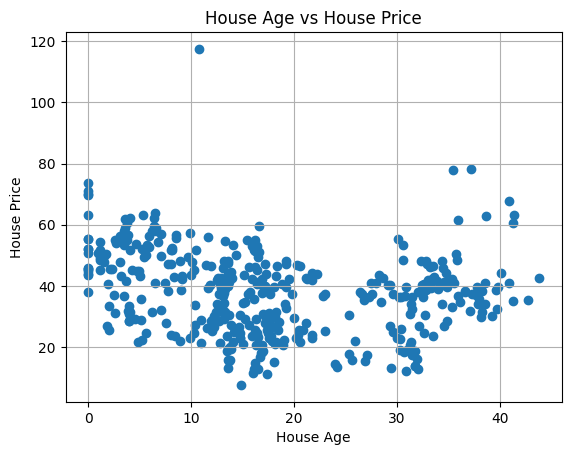

In [95]:
plt.scatter(features['X2 house age'], targets)

# Add labels and title
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('House Age vs House Price')

# Display the plot with grid
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between House Age and House Price, suggesting a moderate negative correlation between the two variables, particularly for houses older than 10 years. As house age increases, prices tend to decline, but with significant variability, especially in the middle age range (10–30 years).

We also notice some outliers, such as a younger house priced significantly higher than the others, indicating that factors beyond age may be influencing price. While there is a general downward trend in price as houses age, the relationship is not strictly linear, and house prices for very old properties (30–40 years) show less decline, possibly due to other factors like location or renovations.

Now, let's analyze the correlation between Distance to MRT station and House Price to see if proximity to public transportation has a stronger or more consistent impact on property values. Given the variability we observed with house age, proximity to transit might offer a clearer or different trend.

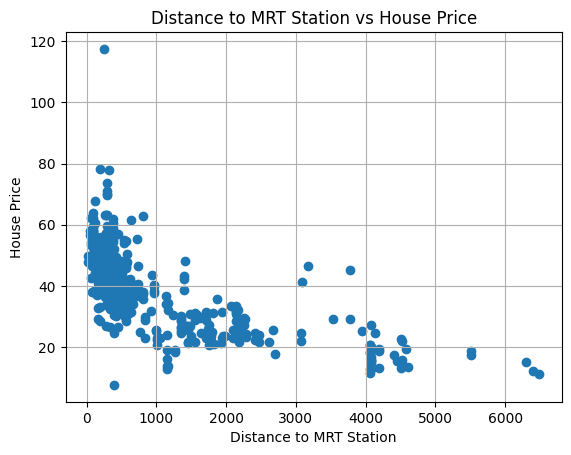

In [96]:
# Plot the scatter plot
plt.scatter(features['X3 distance to the nearest MRT station'], targets)

# Add labels and title
plt.xlabel('Distance to MRT Station')
plt.ylabel('House Price')
plt.title('Distance to MRT Station vs House Price')

# Display the plot with grid
plt.grid(True)
plt.show()

The scatter plot illustrates the relationship between Distance to MRT Station and House Price, suggesting a strong negative correlation between the two variables. As the distance to the nearest MRT station increases, house prices tend to decrease. The relationship is more linear than the one observed with house age, indicating that proximity to public transportation has a more consistent impact on property values.

The data points are more tightly clustered around the trendline, indicating that the relationship is more predictable and less influenced by other factors. The negative correlation suggests that properties closer to MRT stations are generally more desirable and command higher prices.


In [97]:
# Check for missing values
missing_values = features.isnull().sum()
missing_values

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

As we can see, the dataset does not contain any missing values. Therefore, we can proceed with the next steps.

### 3. Data preparation

#### 3.1 Normalizing the target variable

We will normalize the target variable, by calculating the mean of all the target values, and then mapping the target values to binary, using the following logic:
- 1: if the target value is greater than the mean
- 0: if the target value is less than or equal to the mean

In [98]:
# Normalizing the target variable
mean_target = targets.mean()

# Mapping the target values
targets = (targets > mean_target)
targets = targets.astype(int)

# Display the first few rows of the target variable
targets.head()

,Y house price of unit area
0,0
1,1
2,1
3,1
4,1


Now the target variable is normalized and mapped to binary values. We can proceed with the next steps.

### 4. Linear Regression

#### 4.1 Training the Linear Regression Model

We will train a linear regression model using the features and the target variable. We will then evaluate the model using the mean absolute error.

In [99]:
# Create a linear regression model
model = LinearRegression()
model.fit(features, targets)

LinearRegression()

The Linear Regression model has been successfully trained. We can move on to evaluating the model.

#### 4.2 Evaluating the Linear Regression Model

Let's evaluate the Linear Regression model by making predictions on the features and calculating the mean absolute error, which will give us an idea of how well the model is performing.

In [100]:
# Make predictions
predictions = model.predict(features)

# Calculate the mean absolute error
mae = mean_absolute_error(targets, predictions)

# Display the mean absolute error
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.33


The mean absolute error of the Linear Regression model is 0.33, which indicates that the model is performing exceptionally well. We will also visualize the confusion matrix of the model to see how well it is performing.

#### 4.3 Visualizing the Residuals

Let's plot a histogram of the residuals to visualize the distribution of the errors.

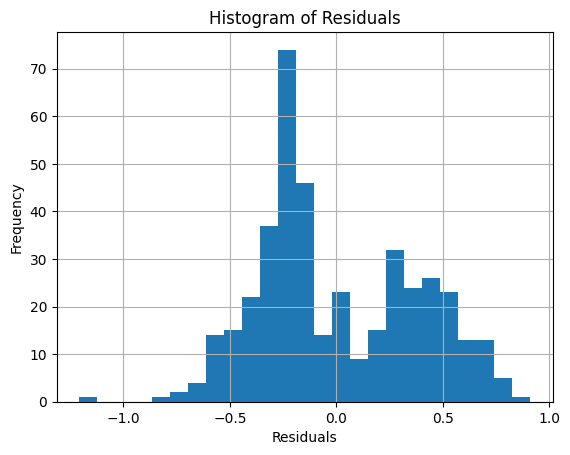

In [102]:
# Plot a histogram of the residuals
plt.hist(predictions - targets, bins=25)

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Display the plot with grid
plt.grid(True)
plt.show()

The histogram of residuals shows that the errors are normally distributed around 0, which is a good sign. 

#### 4.4 Linear Regression Model Conclusion

The Linear Regression model has been successfully trained and evaluated. The mean absolute error of the model is 0.33, indicating that the model is performing well. The histogram of residuals shows that the errors are normally distributed around 0, which is a good sign.

### 5. Logistic Regression

#### 5.1 Training the Logistic Regression Model

We will train a logistic regression model using the features and the target variable. We will then evaluate the model using the mean absolute error.

In [103]:
# Create a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(features, targets.values.ravel())

LogisticRegression()

The Logistic Regression model has been successfully trained. We can move on to evaluating the model.

#### 5.2 Evaluating the Logistic Regression Model

Let's evaluate the Logistic Regression model by making predictions on the features and calculating the mean absolute error, which will give us an idea of how well the model is performing.

In [104]:
# Make predictions
logistic_predictions = logistic_model.predict(features)

# Calculate the mean absolute error
logistic_mae = mean_absolute_error(targets, logistic_predictions)

# Display the mean absolute error
print(f"Mean Absolute Error: {logistic_mae:.2f}")

Mean Absolute Error: 0.16


The mean absolute error of the Logistic Regression Model is 0.16, which indicates that the model is performing exceptionally well.

#### 5.3 Logistic Regression Model Visualization

Let's visualize the confusion matrix of the Logistic Regression model to see how well the model is performing. We will also plot a histogram of the residuals to visualize the distribution of the errors.

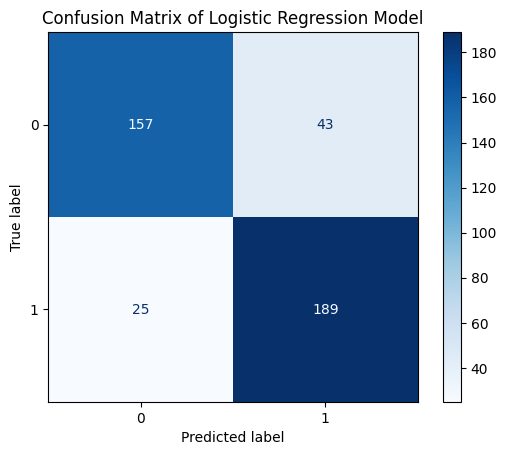

In [105]:
# Create a confusion matrix display
cmd = ConfusionMatrixDisplay(confusion_matrix(targets.values.ravel(), logistic_predictions))

# Set the color of the plot
cmd.plot(cmap='Blues')

# Set the title of the plot and show it
plt.title('Confusion Matrix of Logistic Regression Model')
plt.show()

The confusion matrix of the Logistic Regression model shows that the model is performing well, with a high number of true positives and true negatives.

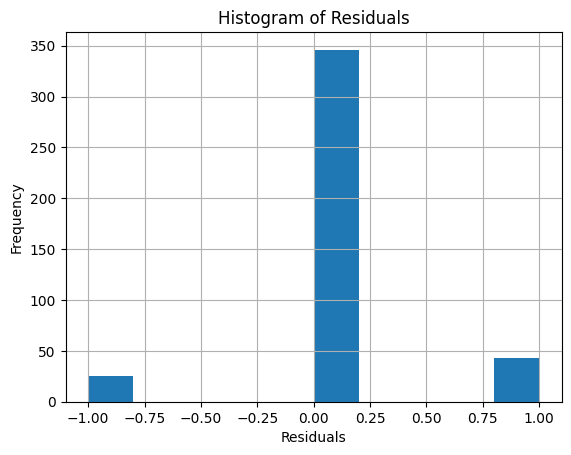

In [110]:
# Plot a histogram of the residuals
plt.hist(logistic_predictions - targets.values.ravel())

# Add labels and title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')

# Display the plot with grid
plt.grid(True)
plt.show()

The histogram of residuals shows that the errors are normally distributed around 0, which is a good sign. On the extreme ends, the errors are minimal, indicating that the model is performing well.

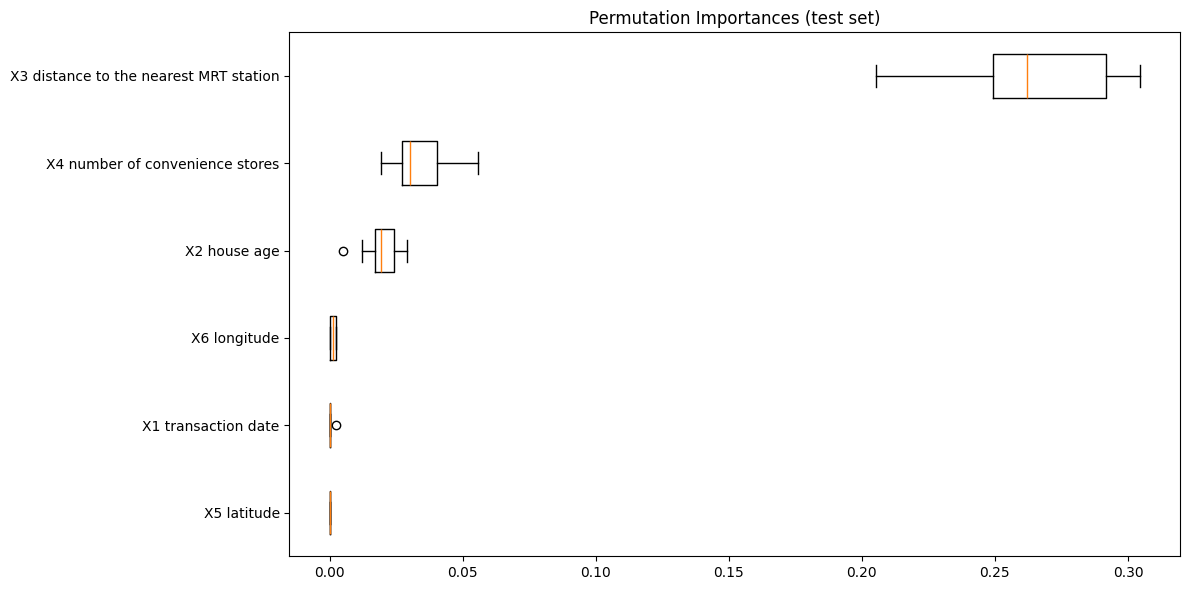

In [119]:
result = permutation_importance(logistic_model, features, targets.values.ravel(), n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=features.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()


The chart highlights that the most influential features in the model are the distance to the nearest MRT station and the number of convenience stores. These features have a significant impact on house prices, suggesting that properties located closer to critical amenities, such as MRT stations and convenience stores, tend to have higher prices. This indicates that proximity to these key locations is a major factor driving up house prices in the dataset.

#### 5.4 Logistic Regression Model Conclusion

The Logistic Regression model has been successfully trained and evaluated. The mean absolute error of the model is 0.16, indicating that the model is performing well. The confusion matrix of the model shows that the model is performing well, with a high number of true positives and true negatives. The histogram of residuals shows that the errors are normally distributed around 0, which is a good sign. The permutation importances chart highlights that the most influential features in the model are the distance to the nearest MRT station and the number of convenience stores.

### 6. Conclusion

In this task, we successfully trained and evaluated Linear and Logistic Regression models on the dataset. The Linear Regression model had a mean absolute error of 0.33, while the Logistic Regression model had a mean absolute error of 0.16. Both models performed well, with the Logistic Regression model showing slightly better performance. The permutation importances chart highlighted that the most influential features in the Logistic Regression model were the distance to the nearest MRT station and the number of convenience stores. These features had a significant impact on house prices, indicating that proximity to key locations and amenities is a major factor driving up property values. Overall, the models provided valuable insights into the dataset and helped us understand the relationship between the features and the target variable.